# Sentiment analysis: Based on movie/TV shows description

#

In [1]:
import pandas as pd
import numpy as np
import string
import re

In [2]:
data = pd.read_csv("C:/Users/navee/OneDrive/Desktop/GitHub/End_to_end_case_studies/Netflix/Data/Cleaned_data/movies_shows.csv")

In [3]:
data = data.loc[:, ['title','description', 'rating', 'type']]
data.head(2)
data

,title,description,rating,type
0,Norm of the North: King Sized Adventure,Before planning an awesome wedding for his gra...,TV-PG,Movie
1,Jandino: Whatever it Takes,Jandino Asporaat riffs on the challenges of ra...,TV-MA,Movie
2,Transformers Prime,"With the help of three human allies, the Autob...",TV-Y7-FV,TV Show
3,Transformers: Robots in Disguise,When a prison ship crash unleashes hundreds of...,TV-Y7,TV Show
4,#realityhigh,When nerdy high schooler Dani finally attracts...,TV-14,Movie
...,...,...,...,...
6200,Talking Tom and Friends,Full of funny one-liners and always ready for ...,TV-G,TV Show
6201,Pokémon the Series,Ash and his Pikachu travel to the Alola region...,TV-Y7-FV,TV Show
6202,Justin Time,"In Justin's dreams, he and his imaginary frien...",TV-Y,TV Show
6203,Terrace House: Boys & Girls in the City,A new set of six men and women start their liv...,TV-14,TV Show


In [4]:
data['combined_column'] = data.title.apply( lambda x: x.lower() ) + ' ' + data.description.apply( lambda x: x.lower() )

data.head(2)

,title,description,rating,type,combined_column
0,Norm of the North: King Sized Adventure,Before planning an awesome wedding for his gra...,TV-PG,Movie,norm of the north: king sized adventure before...
1,Jandino: Whatever it Takes,Jandino Asporaat riffs on the challenges of ra...,TV-MA,Movie,jandino: whatever it takes jandino asporaat ri...


## Splitting words by space and removing special charaters

In [5]:
data.loc[:, 'combined_column'] = data.combined_column.apply( lambda x: 
                                                  re.split( r"[ :`~#!@$%\^&*()\[\]{}\-_+=;\"<,.>/?|]",x))

data = data.drop(columns=['title','description'])
data.head(2)

,rating,type,combined_column
0,TV-PG,Movie,"[norm, of, the, north, , king, sized, adventur..."
1,TV-MA,Movie,"[jandino, , whatever, it, takes, jandino, aspo..."


## Removing stop words

In [6]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import STOPWORDS

In [7]:
stp_word = list(STOPWORDS) + list(ENGLISH_STOP_WORDS)

print(stp_word)

['during', 'more', 'here', 'them', 'were', "how's", 'a', 'what', "he'd", 'if', "i'd", "there's", 'before', 'how', "he'll", 'he', 'up', 'has', "i've", 'through', 'do', 'further', 'this', 'just', 'then', 'whom', 'having', "we'd", 'at', 'very', 'after', 'com', "where's", 'most', "don't", 'ever', 'yours', 'doing', "they'd", 'with', "who's", 'they', 'themselves', 'no', 'above', 'himself', 'off', 'because', 'any', 'below', 'myself', 'r', 'from', "won't", 'its', 'otherwise', 'can', 'shall', "she'll", "why's", 'her', 'yourself', 'yourselves', 'other', "what's", 'being', 'itself', "you've", 'all', 'also', 'but', "weren't", 'herself', 'been', "let's", 'not', "we're", 'your', 'an', 'my', "wasn't", 'when', "didn't", 'again', "wouldn't", 'theirs', "couldn't", "we'll", 'did', 'would', "it's", 'like', 'are', "hasn't", 'get', "we've", 'she', "i'm", 'nor', 'http', 'else', 'i', 'and', 'is', 'as', 'same', 'only', 'be', 'until', 'few', 'of', 'both', 'me', 'so', 'who', 'had', "can't", "they've", "shouldn't

In [8]:
data.loc[:,'combined_column'] = data.combined_column.apply( lambda x: [w for w in x if w not in stp_word] )

data.head(2)

,rating,type,combined_column
0,TV-PG,Movie,"[norm, north, , king, sized, adventure, planni..."
1,TV-MA,Movie,"[jandino, , takes, jandino, asporaat, riffs, c..."


## Removing panchuations (if any)

In [9]:
data.loc[:, 'combined_column'] = data.combined_column.apply( lambda x: [ w for w in x if w not in string.punctuation] )

data.head(2)

,rating,type,combined_column
0,TV-PG,Movie,"[norm, north, king, sized, adventure, planning..."
1,TV-MA,Movie,"[jandino, takes, jandino, asporaat, riffs, cha..."


## Removing single charater words like 'a' etc. but not a single charater digit.

In [10]:
data.loc[:, 'combined_column'] = data.combined_column.apply( lambda x: [w for w in x if len(w) > 1 or w.isdigit() ] )

data.head(2)

,rating,type,combined_column
0,TV-PG,Movie,"[norm, north, king, sized, adventure, planning..."
1,TV-MA,Movie,"[jandino, takes, jandino, asporaat, riffs, cha..."


## count of tags of speech

In [11]:
from nltk import pos_tag

In [12]:
data.loc[:, 'pos_tag'] = data.combined_column.apply( lambda x: pos_tag(x) )

data.head(2)

,rating,type,combined_column,pos_tag
0,TV-PG,Movie,"[norm, north, king, sized, adventure, planning...","[(norm, JJ), (north, JJ), (king, VBG), (sized,..."
1,TV-MA,Movie,"[jandino, takes, jandino, asporaat, riffs, cha...","[(jandino, NN), (takes, VBZ), (jandino, NN), (..."


## Joining the keywords 

In [13]:
data.loc[:, 'combined_column'] = data.combined_column.apply( lambda x: " ".join(x) )

data.head(2)

,rating,type,combined_column,pos_tag
0,TV-PG,Movie,norm north king sized adventure planning aweso...,"[(norm, JJ), (north, JJ), (king, VBG), (sized,..."
1,TV-MA,Movie,jandino takes jandino asporaat riffs challenge...,"[(jandino, NN), (takes, VBZ), (jandino, NN), (..."


# Lemmization

In [14]:
# Not using PorterStemmer as "PorterStemmer" dont provide meaningfull word

In [15]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [16]:
data.loc[:, 'combined_column'] = data.combined_column.apply(lambda x: WordNetLemmatizer().lemmatize(x))

data.head(2)

,rating,type,combined_column,pos_tag
0,TV-PG,Movie,norm north king sized adventure planning aweso...,"[(norm, JJ), (north, JJ), (king, VBG), (sized,..."
1,TV-MA,Movie,jandino takes jandino asporaat riffs challenge...,"[(jandino, NN), (takes, VBZ), (jandino, NN), (..."


# Sentiment analysis

In [17]:
from textblob import TextBlob

In [18]:
data.loc[:, 'subjectivity'] = data.combined_column.apply( lambda x: TextBlob(x).subjectivity )

data.loc[:, 'polarity'] = data.combined_column.apply( lambda x: TextBlob(x).polarity )



data.head(10)

,rating,type,combined_column,pos_tag,subjectivity,polarity
0,TV-PG,Movie,norm north king sized adventure planning aweso...,"[(norm, JJ), (north, JJ), (king, VBG), (sized,...",0.750000,-0.027778
1,TV-MA,Movie,jandino takes jandino asporaat riffs challenge...,"[(jandino, NN), (takes, VBZ), (jandino, NN), (...",0.000000,0.000000
2,TV-Y7-FV,TV Show,transformers prime help human allies autobots ...,"[(transformers, NNS), (prime, JJ), (help, NN),...",0.100000,0.000000
3,TV-Y7,TV Show,transformers robots disguise prison ship crash...,"[(transformers, NNS), (robots, VBP), (disguise...",0.454545,0.136364
4,TV-14,Movie,realityhigh nerdy high schooler dani finally a...,"[(realityhigh, JJ), (nerdy, RB), (high, JJ), (...",0.401667,0.048333
5,TV-MA,TV Show,apaches young journalist forced life crime sav...,"[(apaches, NNS), (young, JJ), (journalist, NN)...",0.300000,-0.100000
6,R,Movie,automata dystopian future insurance adjuster t...,"[(automata, NNS), (dystopian, JJ), (future, JJ...",0.041667,-0.066667
7,TV-MA,Movie,fabrizio copano solo pienso en mi fabrizio cop...,"[(fabrizio, JJ), (copano, NN), (solo, NN), (pi...",0.000000,0.000000
8,TV-MA,TV Show,chasers california's 2016 season rages brave b...,"[(chasers, NNS), (california's, VBP), (2016, C...",1.000000,0.800000
9,R,Movie,good people struggling couple believe luck sta...,"[(good, JJ), (people, NNS), (struggling, VBG),...",0.425000,0.350000


In [19]:
data.loc[:, 'sentiment'] = np.where(data.polarity >0 , 'positive sentiment', 'negative sentiment')

data.head(2)

,rating,type,combined_column,pos_tag,subjectivity,polarity,sentiment
0,TV-PG,Movie,norm north king sized adventure planning aweso...,"[(norm, JJ), (north, JJ), (king, VBG), (sized,...",0.75,-0.027778,negative sentiment
1,TV-MA,Movie,jandino takes jandino asporaat riffs challenge...,"[(jandino, NN), (takes, VBZ), (jandino, NN), (...",0.00,0.000000,negative sentiment


In [20]:
data.groupby(by=['type','rating'])[['subjectivity', 
                                    'polarity']].mean().sort_values(by=['type','polarity','subjectivity'])

subjectivity  polarity
type    rating                          
Movie   R             0.429482  0.004464
        TV-MA         0.447699  0.022472
        NR            0.486179  0.033160
        PG-13         0.414665  0.046796
        TV-14         0.448029  0.059678
        TV-Y7-FV      0.380963  0.062064
        PG            0.458651  0.066089
        TV-Y7         0.478505  0.090640
        G             0.358060  0.101945
        TV-PG         0.423774  0.103242
        TV-G          0.462074  0.110290
        UR            0.464499  0.115040
        TV-Y          0.575180  0.231881
        NC-17         0.336667  0.330000
TV Show R             0.209643 -0.064286
        TV-Y7-FV      0.522437 -0.040825
        TV-MA         0.456467  0.036805
        TV-14         0.488056  0.089707
        TV-Y7         0.564247  0.108538
        TV-PG         0.492666  0.140454
        TV-G          0.481578  0.145723
        NR            0.461385  0.156145
        TV-Y          0.561466  0.185310
        PG            0.750000  0.208333
        G             0.475000  0.212500

In [21]:
data.groupby(['rating','sentiment'])[['sentiment']].count()

sentiment
rating   sentiment                    
G        negative sentiment         16
         positive sentiment         21
NC-17    positive sentiment          2
NR       negative sentiment        109
         positive sentiment        108
PG       negative sentiment         83
         positive sentiment        100
PG-13    negative sentiment        135
         positive sentiment        150
R        negative sentiment        297
         positive sentiment        211
TV-14    negative sentiment        765
         positive sentiment        927
TV-G     negative sentiment         57
         positive sentiment         92
TV-MA    negative sentiment       1053
         positive sentiment        969
TV-PG    negative sentiment        283
         positive sentiment        415
TV-Y     negative sentiment         29
         positive sentiment        113
TV-Y7    negative sentiment         66
         positive sentiment        102
TV-Y7-FV negative sentiment         54
         positive sentiment         41
UR       negative sentiment          3
         positive sentiment          4

In [22]:
data.pivot_table(columns='sentiment', index='rating', aggfunc='size',fill_value=0)

sentiment,negative sentiment,positive sentiment
rating,,
G,16,21
NC-17,0,2
NR,109,108
PG,83,100
PG-13,135,150
R,297,211
TV-14,765,927
TV-G,57,92
TV-MA,1053,969


# WordCloud

In [23]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
joind_sent = ' '.join( [ w for w in data.combined_column ])

joind_sent

"norm north king sized adventure planning awesome wedding grandfather polar bear king stolen artifact evil archaeologist jandino takes jandino asporaat riffs challenges raising kids serenades audience rousing rendition sex comedy transformers prime help human allies autobots protect earth onslaught decepticons leader megatron transformers robots disguise prison ship crash unleashes hundreds decepticons earth bumblebee leads new autobot force protect humankind realityhigh nerdy high schooler dani finally attracts longtime crush lands cross hairs ex social media celebrity apaches young journalist forced life crime save father family series based novel miguel sáez carral automata dystopian future insurance adjuster tech company investigates robot killed violating protocol discovers global conspiracy fabrizio copano solo pienso en mi fabrizio copano takes audience participation level stand set reflecting sperm banks family whatsapp groups chasers california's 2016 season rages brave backco

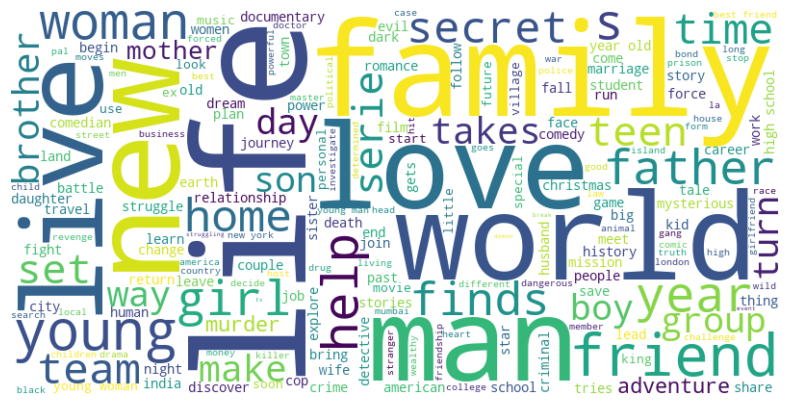

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(joind_sent)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

# -----------------------------------------------------END-----------------------------------------------------